# Example usage of the BBTD class (Vanilla ALS)

In [6]:
import pybbtd.bbtd as bbtd
from pybbtd.solvers import bbtd_vanilla_als
import numpy as np
from pybbtd.visualization import draw_metrics

In [7]:
# Define tensor size and BBTD parameters
J, K, M, N = 20, 25, 10, 10  # dimensions of the 4D tensor
R = 2  # number of BBTD terms
L1 = 5  # rank of the first block (A, B)
L2 = 2  # rank of the second block (C, D)

# Generate BBTD model
X = bbtd.BBTD([J, K, M, N], R, L1, L2)

In [8]:
from pybbtd.uniqueness import check_uniqueness_BBTD

# Check uniqueness of the BBTD model
is_unique = check_uniqueness_BBTD(J, K, M, N, R, L1, L2)
print(f"Uniqueness guaranteed: {is_unique}")

Uniqueness guaranteed: True


In [3]:
# Create ground truth tensor using random factors
A0, B0, C0, D0 = bbtd_vanilla_als.init_BBTD_factors(X, strat="random")

# Get constraint matrices
phi, psi = X.get_constraint_matrices()

# Generate the ground truth tensor with small noise
T_observed = bbtd.factors_to_tensor(A0, B0, C0, D0, phi, psi) + 1e-6 * np.random.randn(
    *X.dims
)

Exiting early at iteration 14 due to insufficient decrease of cost.


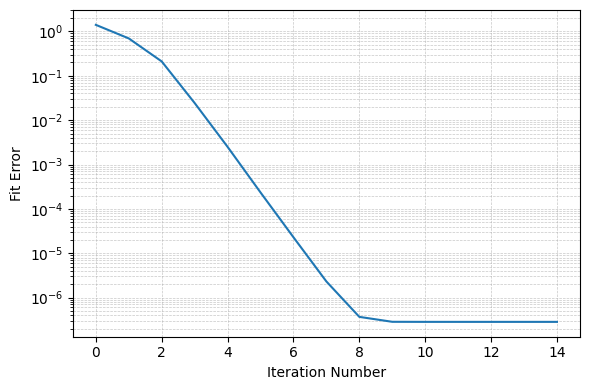

In [4]:
# Fit the model using random initialization
X.fit(
    T_observed,
    algorithm="ALS",
    max_iter=500,
    init="random",
    rel_tol=1e-9,
    abs_tol=1e-15,
)

# Save the fit error for comparison with SVD init
rand_init_fit_error = X.fit_error

# Retrieve the estimated factors
A_est, B_est, C_est, D_est = X.factors

# Check convergence curve
draw_metrics.plot_error(X.fit_error)

Exiting early at iteration 12 due to insufficient decrease of cost.


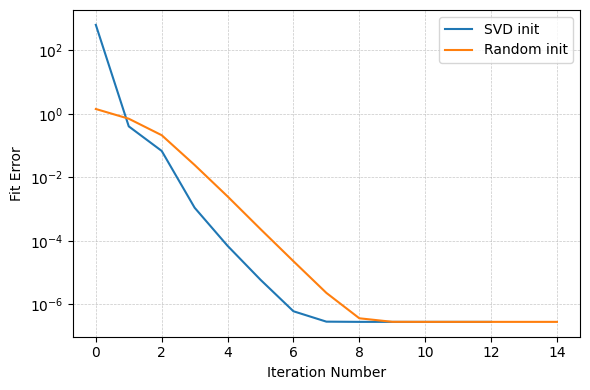

In [5]:
# Compare with SVD init
X.fit(
    T_observed, algorithm="ALS", max_iter=500, init="svd", rel_tol=1e-9, abs_tol=1e-15
)
svd_init_fit_error = X.fit_error

draw_metrics.plot_error(
    [svd_init_fit_error, rand_init_fit_error], labels=[r"SVD init", r"Random init"]
)